## Market Turbulance and Other Visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


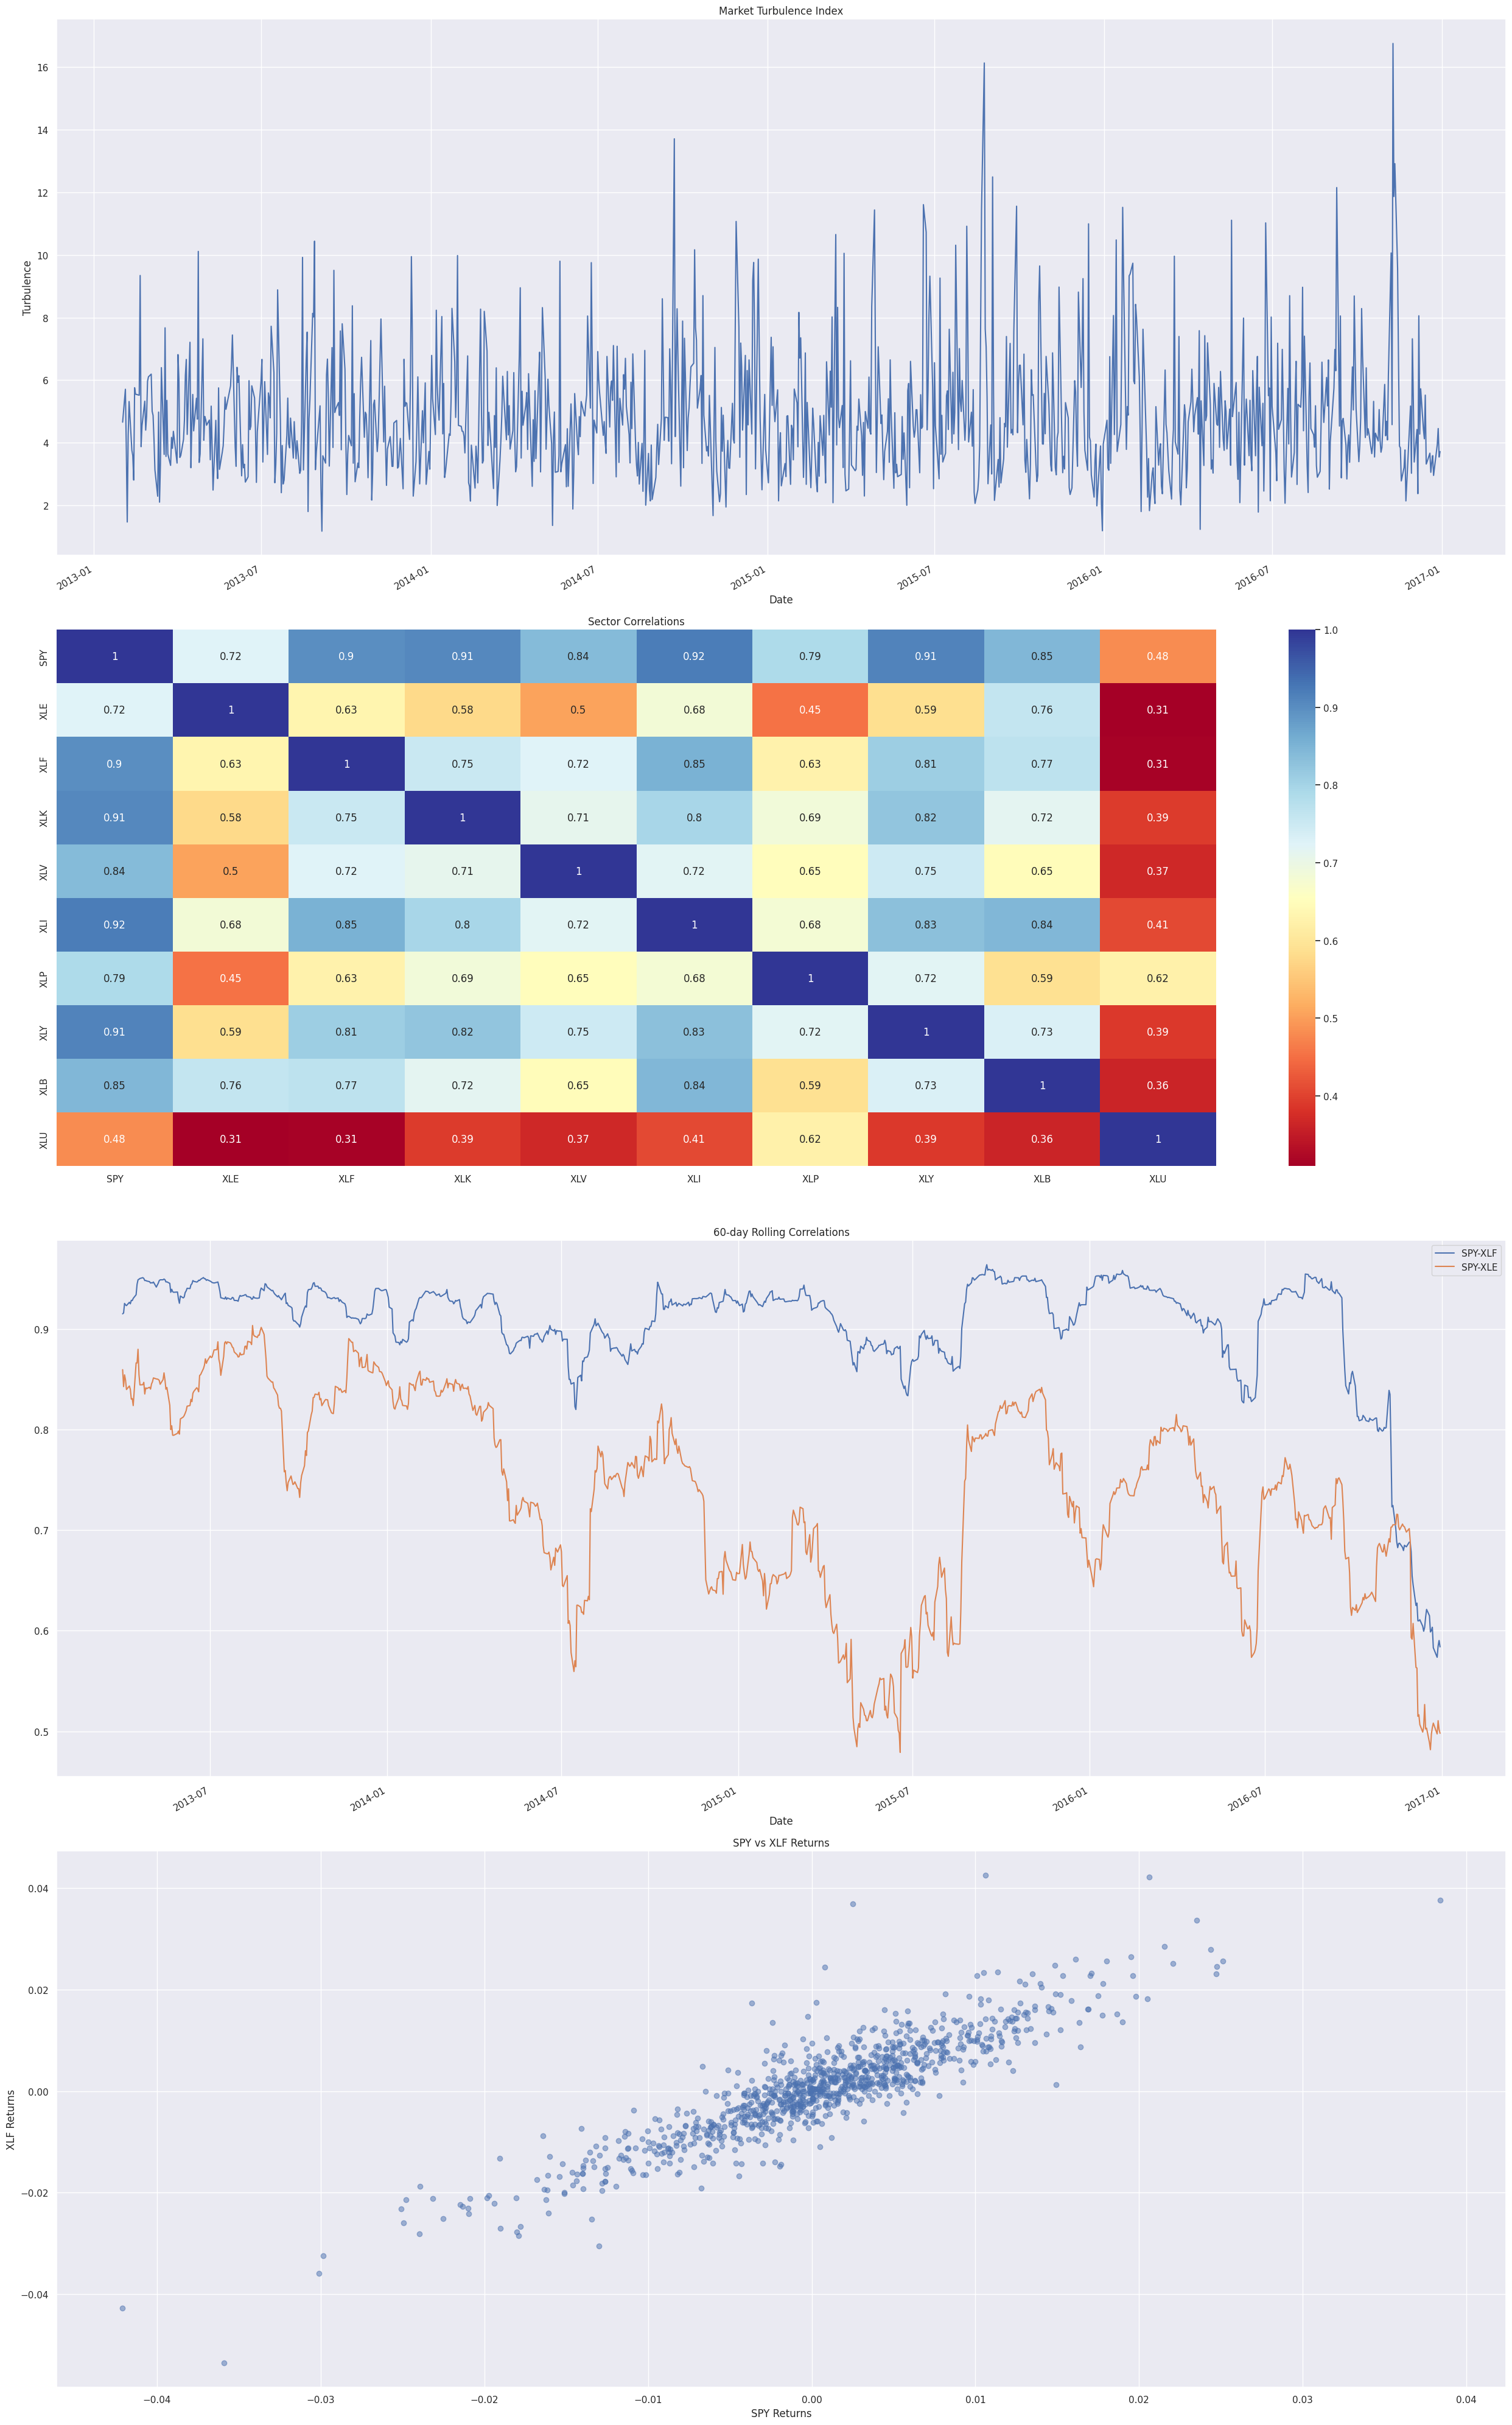


Turbulence Statistics:
count    987.000000
mean       4.896310
std        2.017614
min        1.183443
25%        3.494200
50%        4.505556
75%        5.780284
max       16.742982
dtype: float64

Highest Turbulence Dates:
Date
2016-11-09    16.742982
2015-08-24    16.120870
2014-09-22    13.701635
2016-11-11    12.908500
2015-09-02    12.485385
dtype: float64


In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Download data
sectors = ['SPY', 'XLE', 'XLF', 'XLK', 'XLV', 'XLI', 'XLP', 'XLY', 'XLB', 'XLU']
data = pd.DataFrame()

for ticker in sectors:
   data[ticker] = yf.download(ticker, '2013-01-01', '2016-12-31')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Calculate Turbulence Index
def calc_turbulence(returns, window=20):
   turbulence = pd.Series(index=returns.index)

   for i in range(window, len(returns)):
       # Get rolling window
       r = returns.iloc[i-window:i]

       # Calculate covariance matrix
       sigma = r.cov()

       # Calculate current return deviation
       delta = returns.iloc[i] - r.mean()

       # Calculate Mahalanobis distance
       try:
           turb = np.sqrt(delta.dot(np.linalg.inv(sigma)).dot(delta))
           turbulence.iloc[i] = turb
       except:
           turbulence.iloc[i] = np.nan

   return turbulence

turbulence = calc_turbulence(returns)

# Plotting
plt.figure(figsize=(25,40))

# Plot 1: Turbulence Index
plt.subplot(4,1,1)
turbulence.plot()
plt.title('Market Turbulence Index')
plt.ylabel('Turbulence')

# Plot 2: Sector Correlations Heatmap
plt.subplot(4,1,2)
sns.heatmap(returns.corr(), annot=True, cmap='RdYlBu')
plt.title('Sector Correlations')

# Plot 3: Rolling Correlations
plt.subplot(4,1,3)
returns['SPY'].rolling(60).corr(returns['XLF']).plot(label='SPY-XLF')
returns['SPY'].rolling(60).corr(returns['XLE']).plot(label='SPY-XLE')
plt.title('60-day Rolling Correlations')
plt.legend()

# Plot 4: Scatter of Returns
plt.subplot(4,1,4)
plt.scatter(returns['SPY'], returns['XLF'], alpha=0.5)
plt.xlabel('SPY Returns')
plt.ylabel('XLF Returns')
plt.title('SPY vs XLF Returns')

plt.tight_layout()
plt.show()

# Additional Analysis
print("\nTurbulence Statistics:")
print(turbulence.describe())

print("\nHighest Turbulence Dates:")
print(turbulence.nlargest(5))

In [8]:
!pip install seaborn

## YTD Change

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


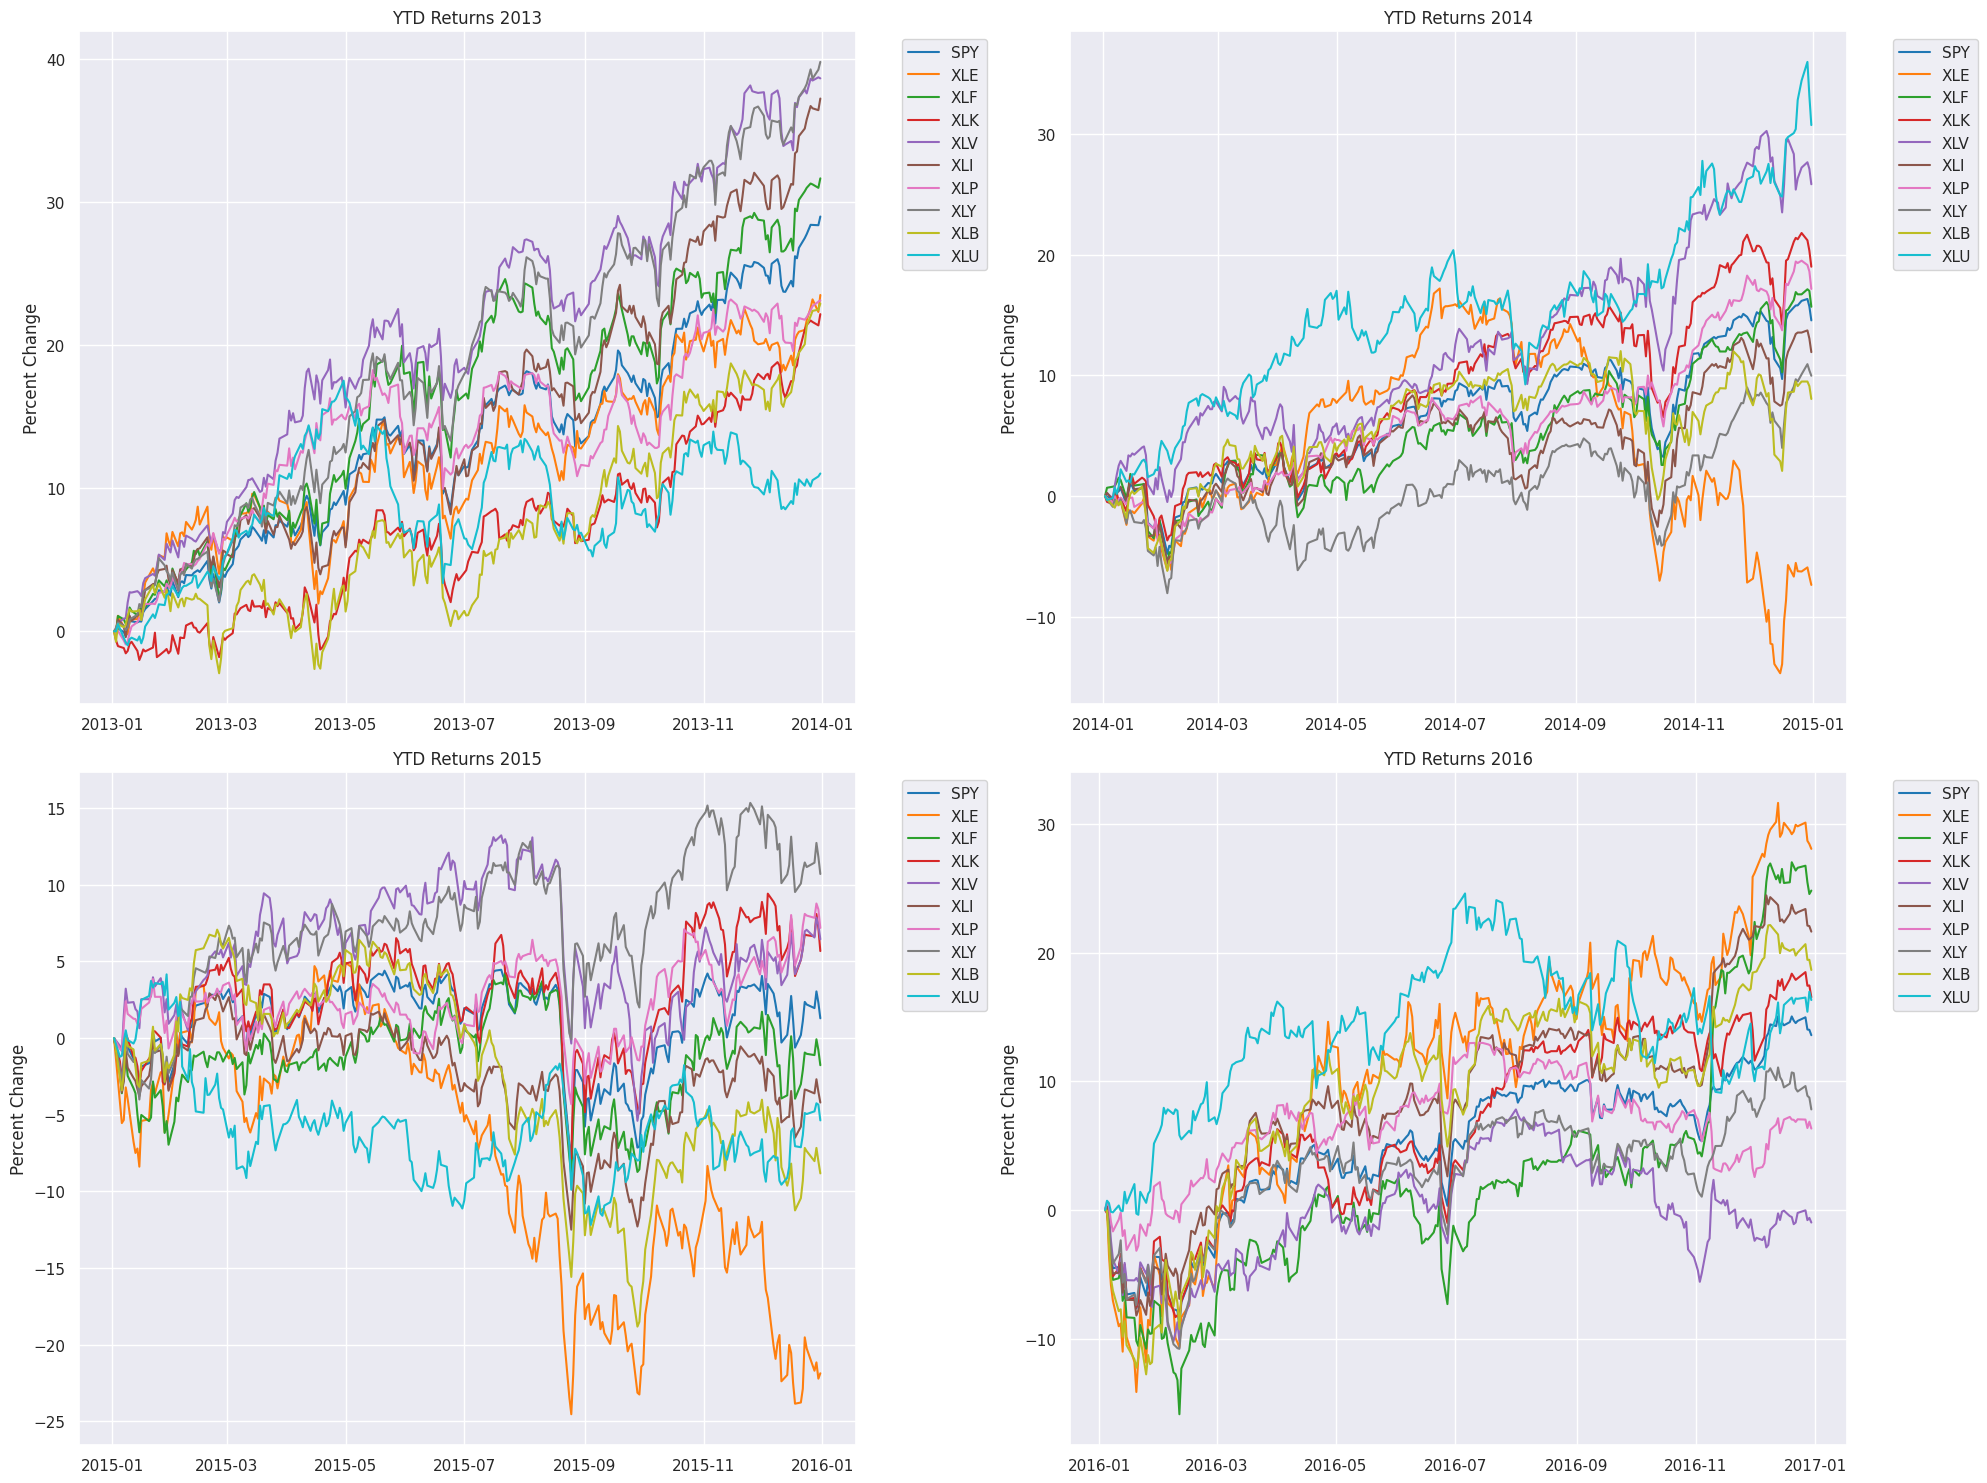

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sectors = ['SPY', 'XLE', 'XLF', 'XLK', 'XLV', 'XLI', 'XLP', 'XLY', 'XLB', 'XLU']
data = pd.DataFrame()

for ticker in sectors:
    data[ticker] = yf.download(ticker, '2013-01-01', '2016-12-31')['Adj Close']

sns.set_theme() # Apply the default seaborn theme
plt.figure(figsize=(20,15))
years = [2013, 2014, 2015, 2016]
colors = plt.cm.tab10(np.linspace(0, 1, len(sectors)))
#line_styles = ['-', '--', ':', '-.']
line_styles = ['-', '-', '-', '-']

for idx, year in enumerate(years):
    plt.subplot(2, 2, idx+1)
    year_data = data[data.index.year == year]

    for i, ticker in enumerate(sectors):
        returns = ((year_data[ticker] / year_data[ticker].iloc[0]) - 1) * 100
        plt.plot(year_data.index, returns,
                label=ticker,
                color=colors[i],
                linestyle=line_styles[i % len(line_styles)])

    plt.title(f'YTD Returns {year}')
    plt.ylabel('Percent Change')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Daily Ranges - Box Plots

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


"# Histograms with PDEs\nplt.subplot(2,1,2)\ncolors = plt.cm.tab10(np.linspace(0, 1, len(sectors)))\n\nfor i, ticker in enumerate(sectors):\n    data = ranges[ticker].dropna()\n    density = gaussian_kde(data)\n    xs = np.linspace(data.min(), data.max(), 200)\n    plt.hist(data, bins=50, density=True, alpha=0.3, color=colors[i], label=ticker)\n    plt.plot(xs, density(xs), color=colors[i])\n\nplt.title('Distribution of Daily Ranges')\nplt.xlabel('Price Range ($)')\nplt.ylabel('Density')\nplt.legend()\n\nplt.tight_layout()\nplt.show()"

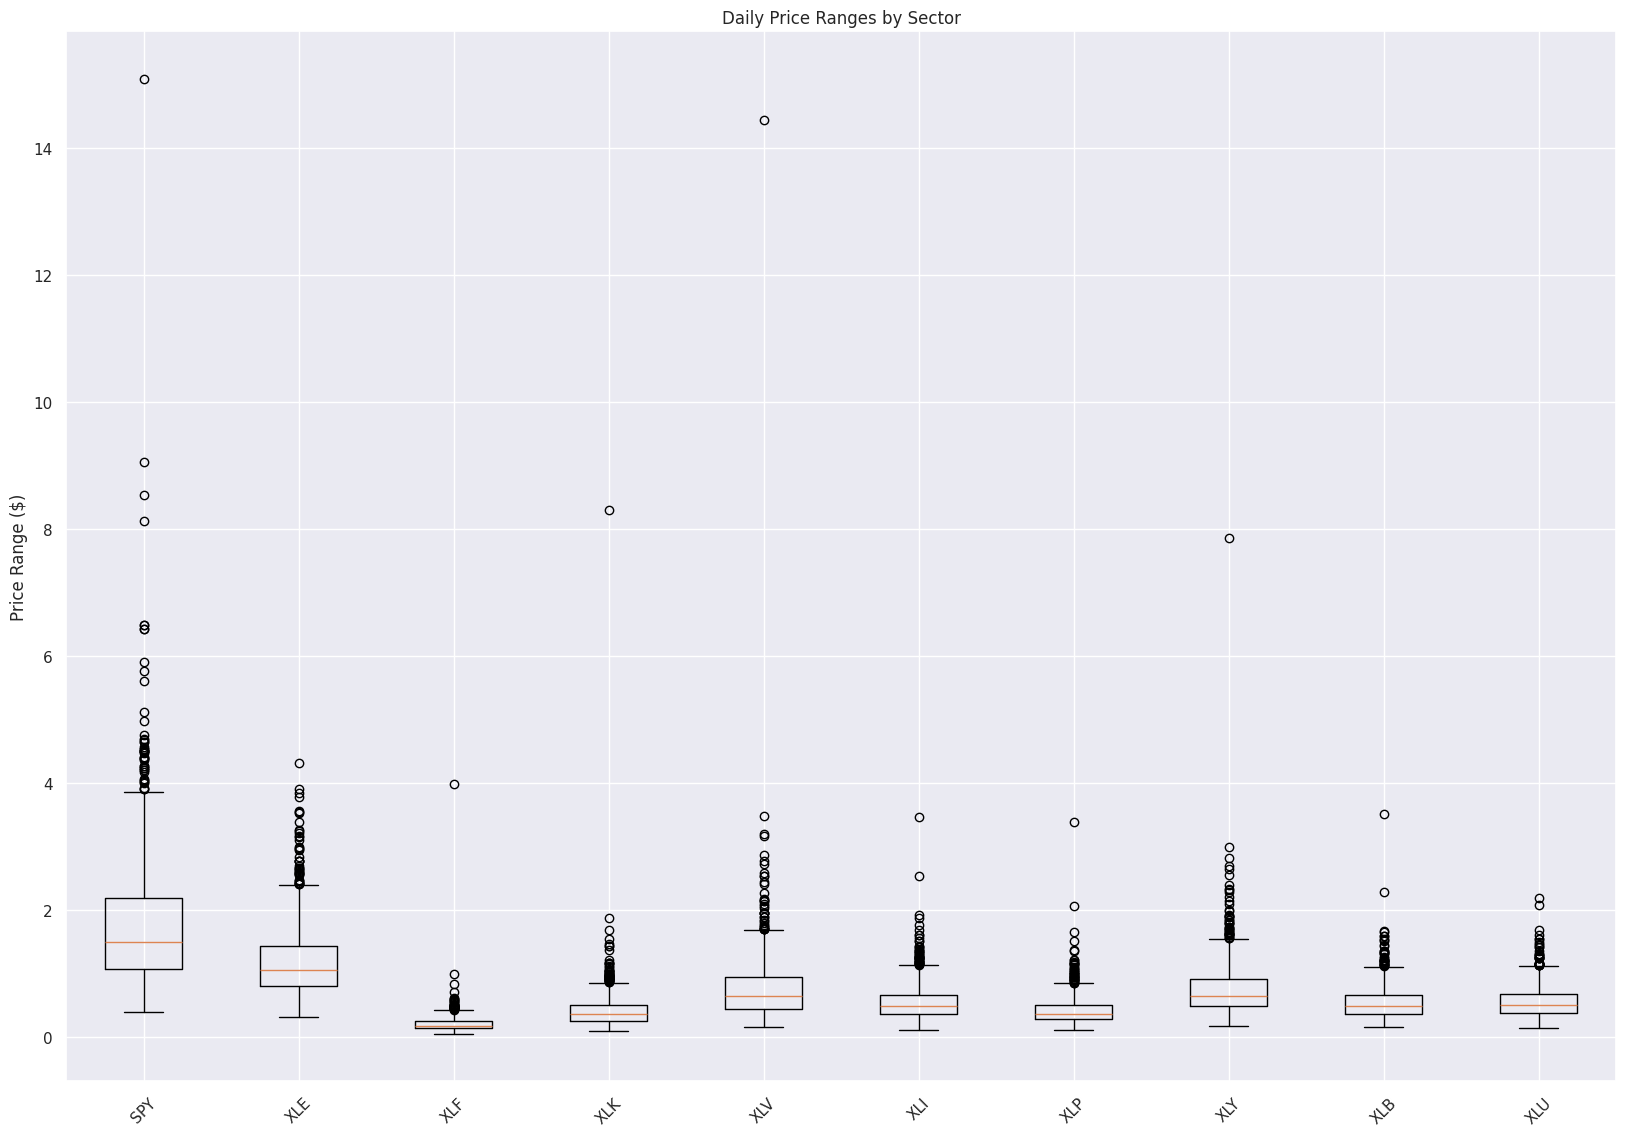

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Get data
sectors = ['SPY', 'XLE', 'XLF', 'XLK', 'XLV', 'XLI', 'XLP', 'XLY', 'XLB', 'XLU']
ranges = pd.DataFrame()

for ticker in sectors:
    data = yf.download(ticker, '2013-01-01', '2016-12-31')
    ranges[ticker] = data['High'] - data['Low']

# Create figure
plt.figure(figsize=(20,30))

# Box plots
plt.subplot(2,1,1)
plt.boxplot([ranges[ticker] for ticker in sectors], labels=sectors)
plt.title('Daily Price Ranges by Sector')
plt.ylabel('Price Range ($)')
plt.xticks(rotation=45)

"""# Histograms with PDEs
plt.subplot(2,1,2)
colors = plt.cm.tab10(np.linspace(0, 1, len(sectors)))

for i, ticker in enumerate(sectors):
    data = ranges[ticker].dropna()
    density = gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 200)
    plt.hist(data, bins=50, density=True, alpha=0.3, color=colors[i], label=ticker)
    plt.plot(xs, density(xs), color=colors[i])

plt.title('Distribution of Daily Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()"""

## Daily Range Histograms with Descriptive Statistics

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


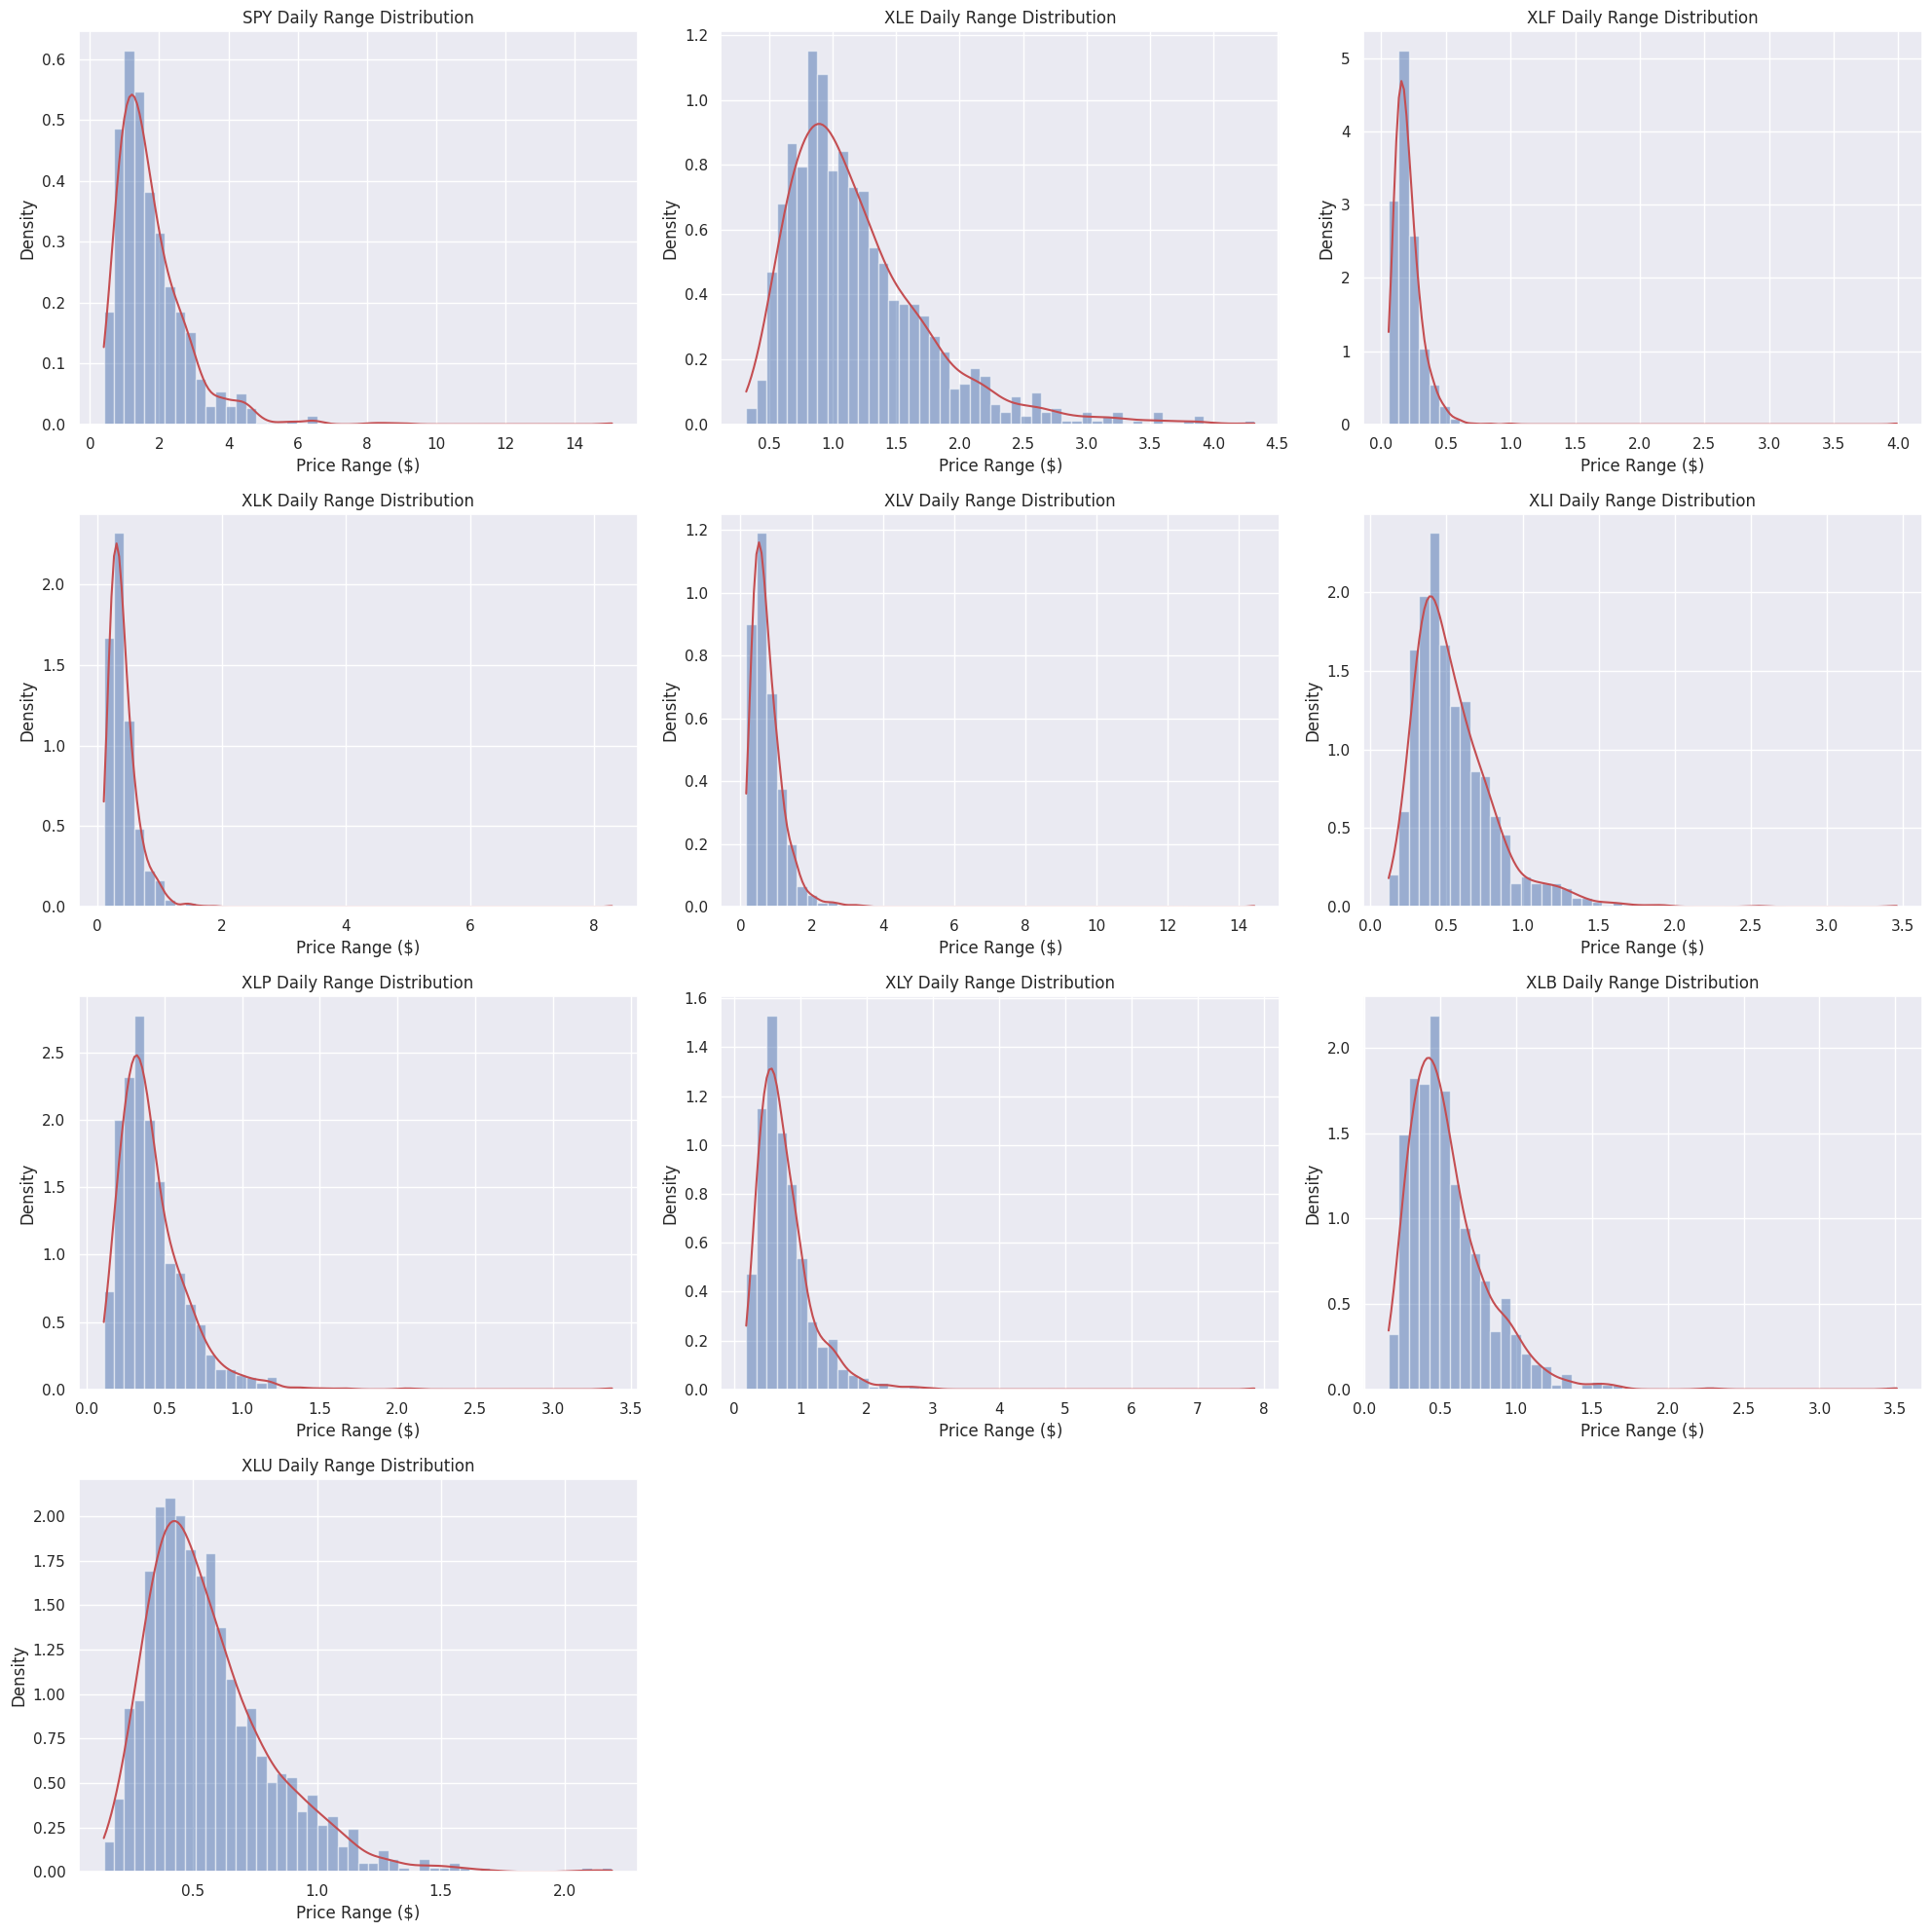


Distribution Statistics:
----------------------------------------------------------------------------------------------------
Ticker         Mean     Median       Mode        Std       Skew   Kurtosis        Min        Max
----------------------------------------------------------------------------------------------------
SPY           1.785      1.495      1.120      1.110      3.336     25.064      0.400     15.080
XLE           1.195      1.060      0.650      0.564      1.592      3.624      0.320      4.320
XLF           0.210      0.179      0.146      0.157     14.367    333.582      0.057      3.989
XLK           0.418      0.360      0.230      0.334     13.534    305.552      0.100      8.290
XLV           0.762      0.645      0.360      0.612     11.746    247.494      0.160     14.440
XLI           0.553      0.490      0.430      0.285      2.546     14.574      0.120      3.460
XLP           0.421      0.370      0.290      0.233      3.430     29.290      0.110      3.

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, mode, skew, kurtosis

# Get data
sectors = ['SPY', 'XLE', 'XLF', 'XLK', 'XLV', 'XLI', 'XLP', 'XLY', 'XLB', 'XLU']
ranges = pd.DataFrame()

for ticker in sectors:
   data = yf.download(ticker, '2013-01-01', '2016-12-31')
   ranges[ticker] = data['High'] - data['Low']

# Plot histograms
n_rows = -(-len(sectors) // 3)
fig, axs = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axs = axs.ravel()

for i, ticker in enumerate(sectors):
   data = ranges[ticker].dropna()
   density = gaussian_kde(data)
   xs = np.linspace(data.min(), data.max(), 200)

   axs[i].hist(data, bins=50, density=True, alpha=0.5)
   axs[i].plot(xs, density(xs), 'r-')
   axs[i].set_title(f'{ticker} Daily Range Distribution')
   axs[i].set_xlabel('Price Range ($)')
   axs[i].set_ylabel('Density')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Print statistics
print("\nDistribution Statistics:")
print("-" * 100)
print(f"{'Ticker':8} {'Mean':>10} {'Median':>10} {'Mode':>10} {'Std':>10} {'Skew':>10} {'Kurtosis':>10} {'Min':>10} {'Max':>10}")
print("-" * 100)

for ticker in sectors:
   data = ranges[ticker].dropna()
   mode_result = mode(data)
   if isinstance(mode_result[0], np.ndarray): # Check if mode returns an array
        data_mode = mode_result[0][0]
   else:
        data_mode = mode_result[0] # if its a scalar, use it directly

   stats = {
       'Mean': data.mean(),
       'Median': data.median(),
       'Mode': data_mode,
       'Std': data.std(),
       'Skew': skew(data),
       'Kurtosis': kurtosis(data),
       'Min': data.min(),
       'Max': data.max()
   }

   print(f"{ticker:8} {stats['Mean']:10.3f} {stats['Median']:10.3f} {stats['Mode']:10.3f} {stats['Std']:10.3f} "
         f"{stats['Skew']:10.3f} {stats['Kurtosis']:10.3f} {stats['Min']:10.3f} {stats['Max']:10.3f}")

## Log Transform Daily Range Histrograms

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


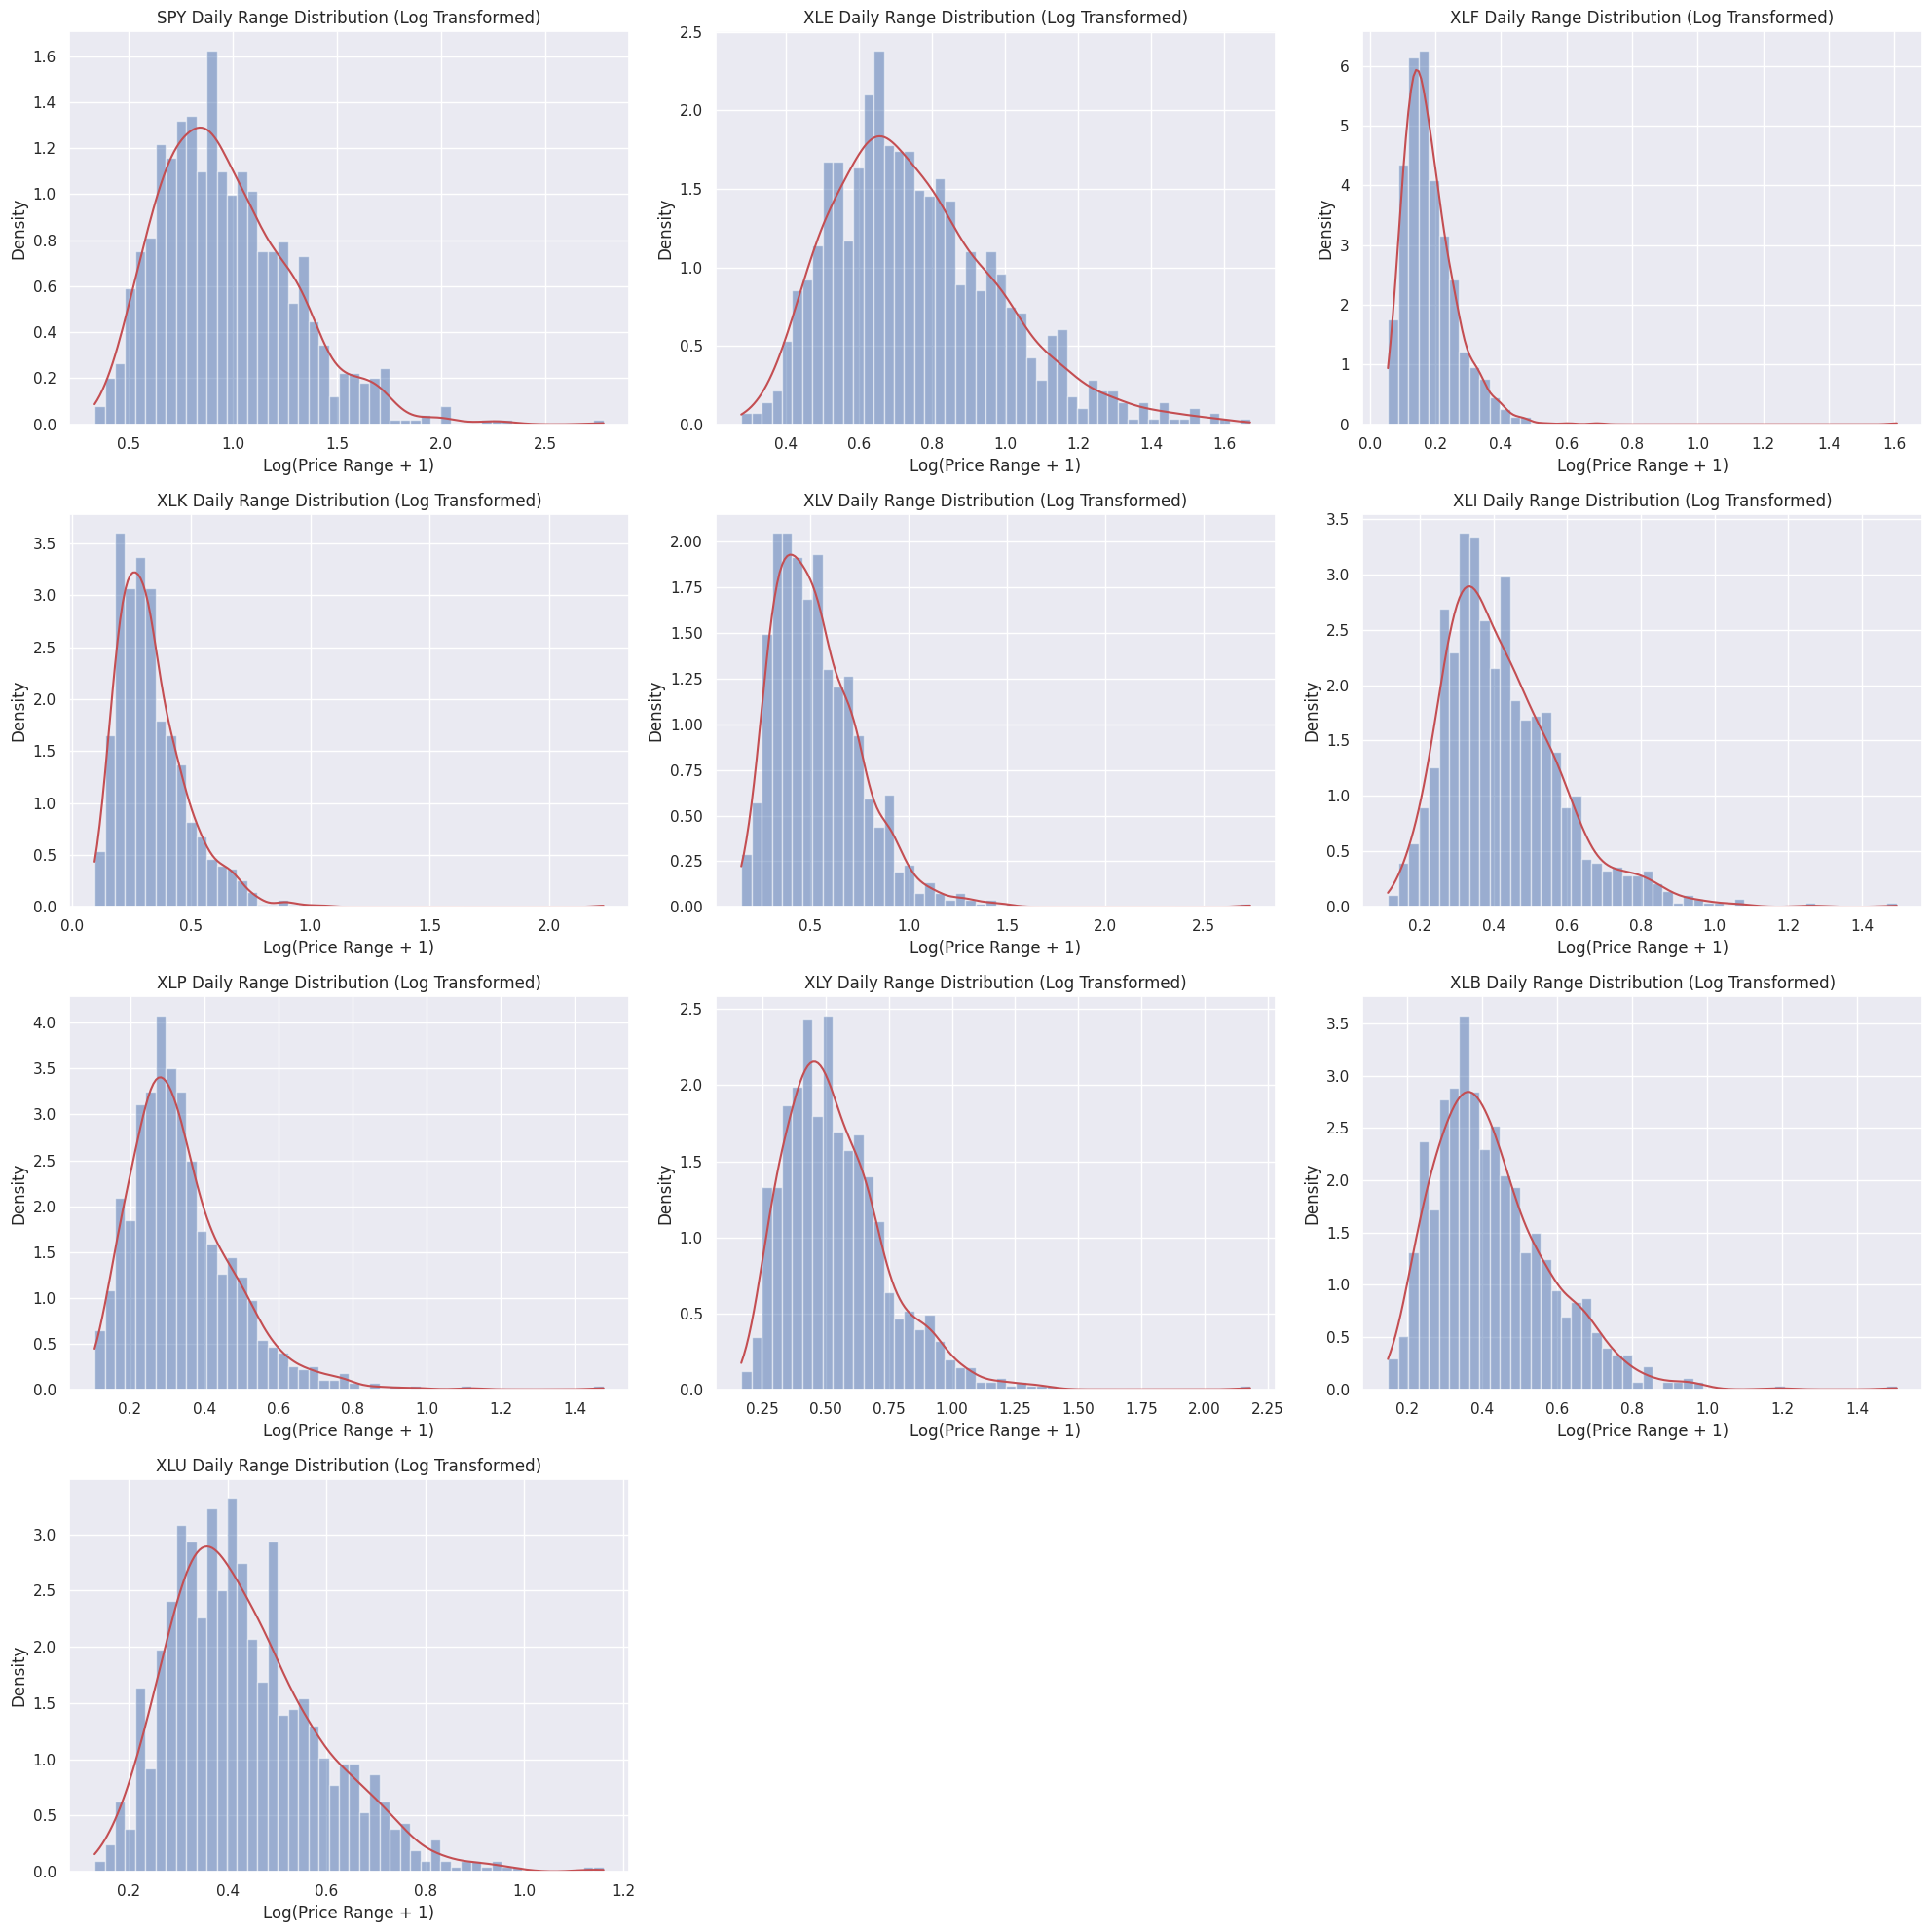

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, mode, skew, kurtosis

# Get data
sectors = ['SPY', 'XLE', 'XLF', 'XLK', 'XLV', 'XLI', 'XLP', 'XLY', 'XLB', 'XLU']
ranges = pd.DataFrame()

for ticker in sectors:
   data = yf.download(ticker, '2013-01-01', '2016-12-31')
   ranges[ticker] = data['High'] - data['Low']

# Plot histograms
n_rows = -(-len(sectors) // 3)
fig, axs = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
axs = axs.ravel()

for i, ticker in enumerate(sectors):
    data = ranges[ticker].dropna()

    # Apply log transformation
    data_log = np.log1p(data)

    # Calculate KDE on log-transformed data
    density = gaussian_kde(data_log)
    xs = np.linspace(data_log.min(), data_log.max(), 200)

    axs[i].hist(data_log, bins=50, density=True, alpha=0.5)
    axs[i].plot(xs, density(xs), 'r-')
    axs[i].set_title(f'{ticker} Daily Range Distribution (Log Transformed)')
    axs[i].set_xlabel('Log(Price Range + 1)')
    axs[i].set_ylabel('Density')

for j in range(i+1, len(axs)):
   fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


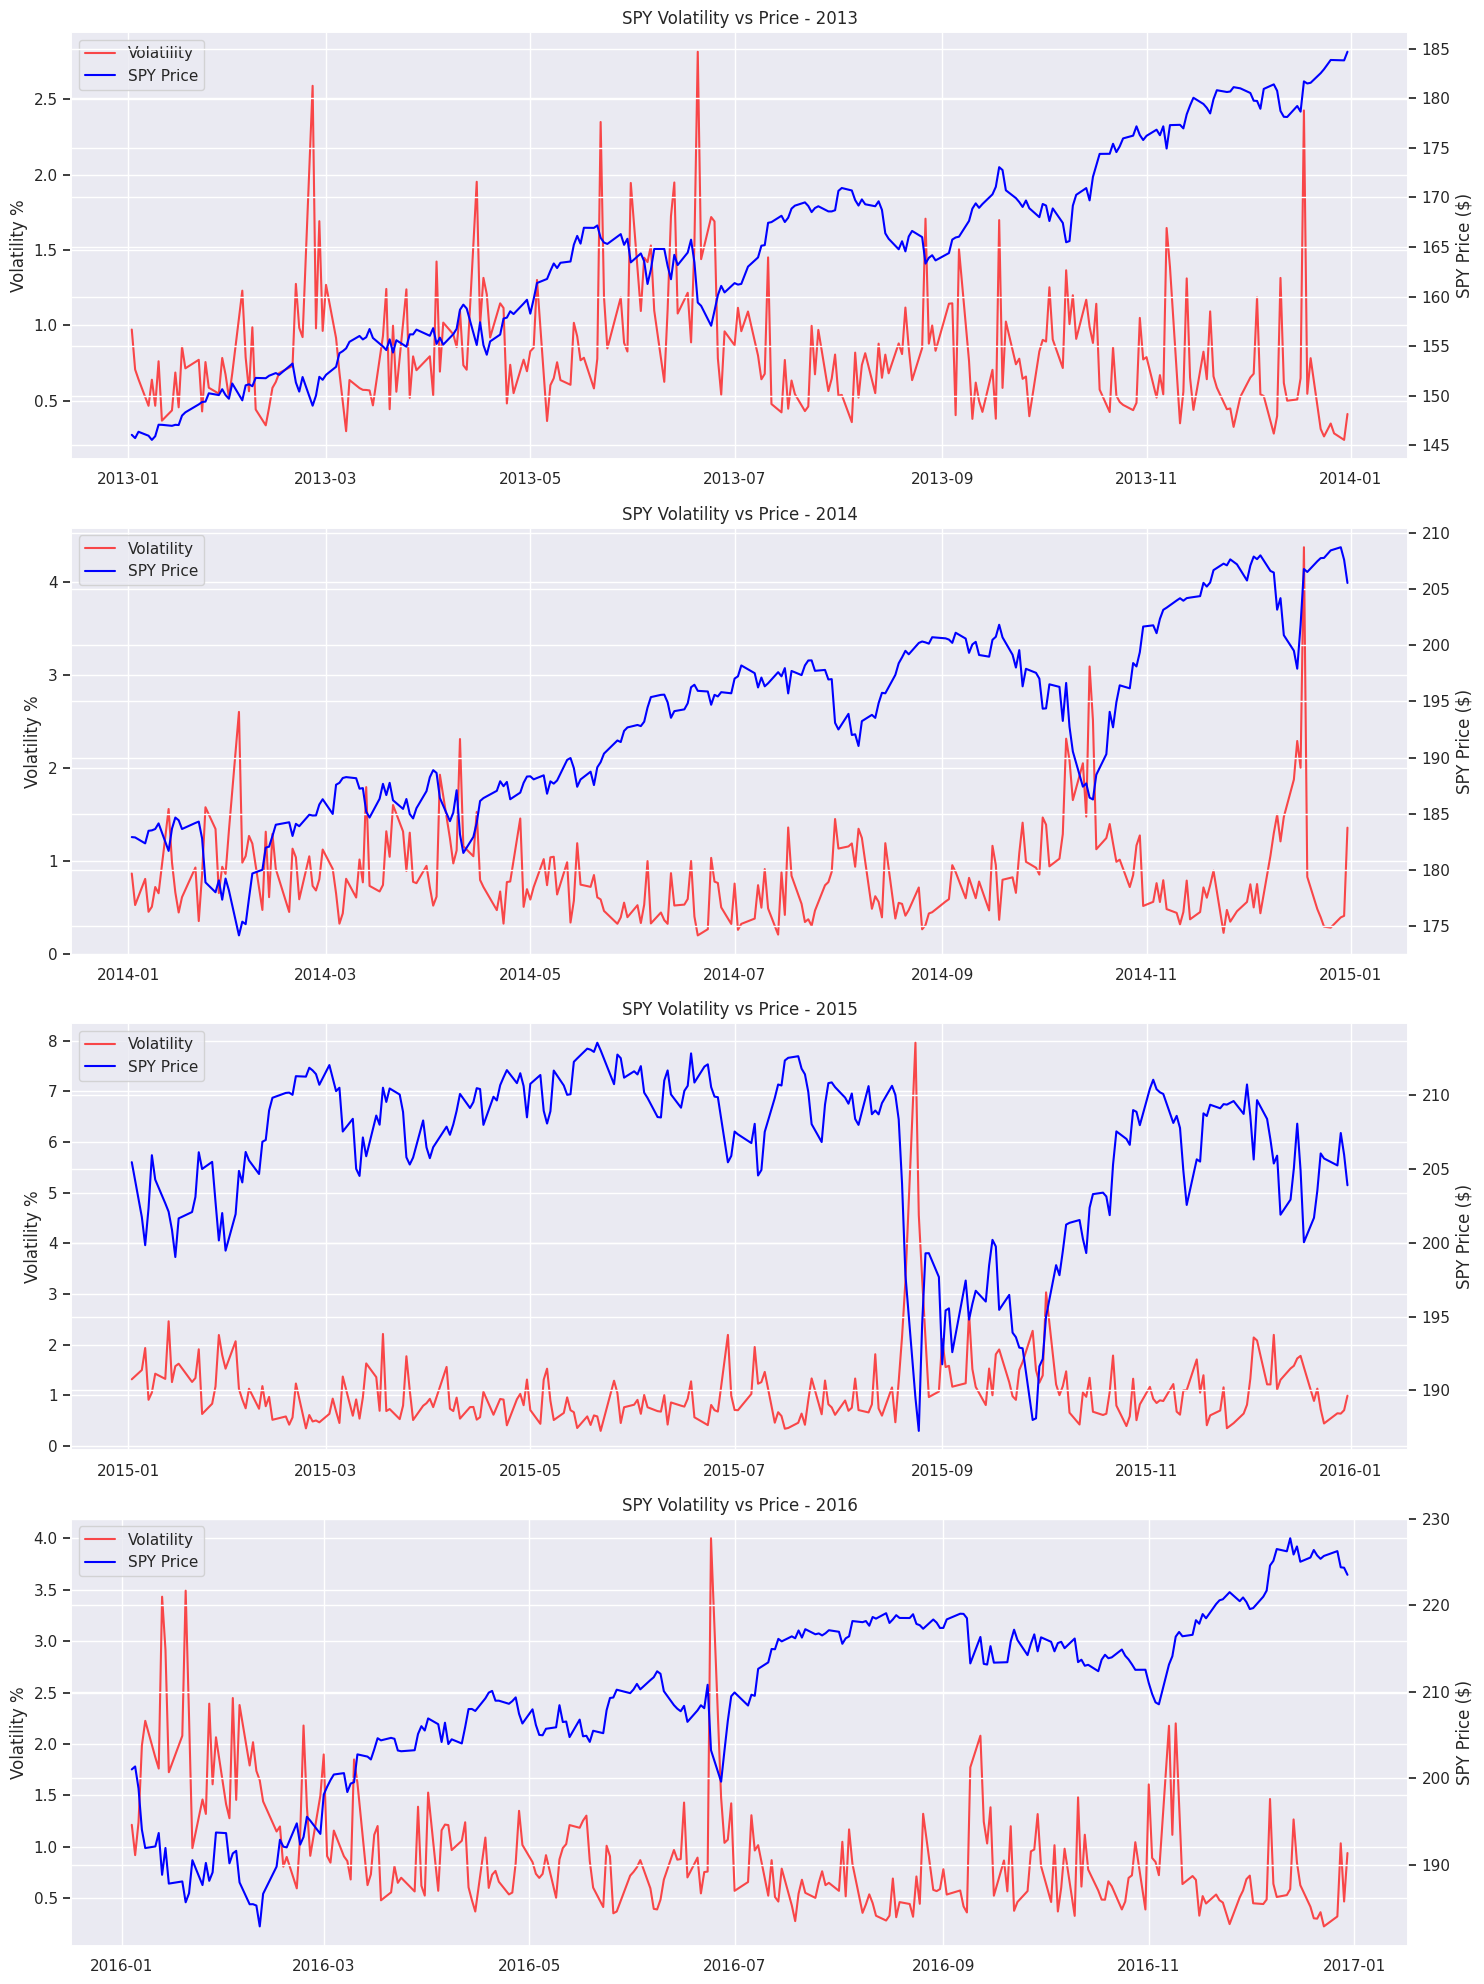

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download SPY data
spy = yf.download('SPY', '2013-01-01', '2016-12-31')
spy['VIX'] = (spy['High'] - spy['Low']) / spy['Close'] * 100

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
years = [2013, 2014, 2015, 2016]

for year, ax1 in zip(years, axes):
   year_data = spy[spy.index.year == year]

   # Left axis - Volatility
   ax1.plot(year_data.index, year_data['VIX'],
            label='Volatility', color='red', alpha=0.7)
   ax1.set_ylabel('Volatility %')

   # Right axis - SPY Price
   ax2 = ax1.twinx()
   ax2.plot(year_data.index, year_data['Close'],
            label='SPY Price', color='blue')
   ax2.set_ylabel('SPY Price ($)')

   ax1.set_title(f'SPY Volatility vs Price - {year}')

   # Combined legend
   lines1, labels1 = ax1.get_legend_handles_labels()
   lines2, labels2 = ax2.get_legend_handles_labels()
   ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()